### PROBLEM STATEMENT
Hybrid Bank seeks to enhance its decision-making processes by analyzing customer data to gain deeper insights into demographics, financial characteristics, and engagement patterns. The objective is to identify trends in service usage, account activity, and customer satisfaction. The findings will highlight key areas for business improvement, including opportunities to optimize services and develop strategies to improve customer retention, ultimately enabling the bank to refine its offerings and better align with customer needs.

### OBJECTIVES
Using the Dataset, we would try to answer Questions that will focus on identifying trends and patterns in Customer Engagement, such as service usage, account activity, and Customer Satisfaction. Answering Questions like:

- Demographic Analysis: Analyze the distribution of customers based on geography, gender, and age. Identify any demographic segments (e.g., by geography or gender) that have a significantly different credit score, balance, or other financial metrics.
 
- Customer Engagement Patterns: Investigate the relationship between customer tenure and engagement (such as the number of products owned, HasCrCard, and IsActiveMember). Analyze the impact of tenure on customer behavior, especially focusing on long-term customer patterns (e.g., do longer-tenured customers tend to hold more products or have higher balances?).

- Financial Performance: Explore credit score distribution and identify which customer segments (e.g., age, gender, geography) tend to have higher or lower credit scores. Analyze customer balance and estimated salary patterns and compare them across different demographic groups.
  
- Exited Customer Analysis: Compare the financial and demographic characteristics of customers who exited the bank versus those who remain active. Identify possible factors (e.g., age, credit score, balance) associated with customers exiting the bank
  .
- Customer Segmentatnio: Based on the available data, identify distinct customer segments (e.g., high-balance vs. low-balance customers) and analyze their unique characteristics. Provide insights into how the bank could optimize its services for each segment, such as offering tailored products to certain demographics or improving engagement with less active member
  s.
### APPROACH
To achieve this, we are going to approach the analysis using the CRISP-DM (Cross-Industry Standard Process for Data Mining) Framework.
- Properly understand and explore the data
- Prepare the data for analysis
- Answer questions to help usachhieve our objectives
- Draw conclusions
- Prepare summaries




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

In [2]:
Cust_df =pd.read_excel ('Bank_Churn_Messy.xlsx')

In [3]:
Cust_df 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [4]:
Acct_df =pd.read_excel('Bank_Churn_Messy.xlsx',sheet_name= 'Account_Info')
Acct_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0


In [5]:
# data merging using a common key 'Customer ID'
comb_df = pd.merge(Cust_df,Acct_df, on ='CustomerId', how='left')

In [6]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [7]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [8]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [9]:
comb_df_copy=comb_df.copy()

Data Dictionary

| **Column Name**       | **Description**                                                                                     | **Data Type** |
|-----------------------|-----------------------------------------------------------------------------------------------------|---------------|
| **CustomerId**         | A unique identifier for each customer.                                                              | Integer       |
| **Surname**            | The customer's last name.                                                                           | String        |
| **CreditScore**        | A numeric representation of the customer's creditworthiness.                                         | Integer       |
| **Geography**          | The customer's country or region.                                                                   | String        |
| **Gender**             | The customer's gender.                                                                               | String        |
| **Age**                | The customer's age in years.                                                                        | Integer       |
| **Tenure**             | The number of years the customer has been with the company.                                          | Integer       |
| **EstimatedSalary**    | The estimated yearly salary of the customer in their local currency.                                 | Float         |
| **Balance**            | The current balance in the customer's account.                                                       | Float         |
| **NumOfProducts**      | The number of products the customer holds with the company.                                          | Integer       |
| **HasCrCard**          | Indicates if the customer holds a credit card (1 for Yes, 0 for No).                                 | Boolean       |
| **IsActiveMember**     | Indicates if the customer is an active member (1 for Yes, 0 for No).                                 | Boolean       |
| **Exited**             | Indicates if the customer has exited the company (1 for Yes, 0 for No).                              | Be for each column.

### DATA CLEANING

In [10]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


Inconsistencies:

- Incorrect data/ data types
- Remove Unwanted Columns
- Rename columns 
- Exited (using the conditional formatting to change 1 to 'yes' and 0 to 'No')
- Replace 'FRA and French' with FRANCE
- Duplicate values
- Null values

In [13]:
## Fill NaN values with 0

comb_df['Age'] = comb_df['Age'].fillna(0).astype(int)

In [14]:
# Convert the 'Age' column to integer

comb_df['Age'] = comb_df['Age'].astype(int)

In [15]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10004 non-null  int64 
 1   Surname          10001 non-null  object
 2   CreditScore      10004 non-null  int64 
 3   Geography        10004 non-null  object
 4   Gender           10004 non-null  object
 5   Age              10004 non-null  int32 
 6   Tenure_x         10004 non-null  int64 
 7   EstimatedSalary  10004 non-null  object
 8   Balance          10004 non-null  object
 9   NumOfProducts    10004 non-null  int64 
 10  HasCrCard        10004 non-null  object
 11  Tenure_y         10004 non-null  int64 
 12  IsActiveMember   10004 non-null  object
 13  Exited           10004 non-null  int64 
dtypes: int32(1), int64(6), object(7)
memory usage: 1.0+ MB


In [16]:
# Remove the Euro sign and convert the column to numeric

comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].str.replace('€', '').str.strip() 

In [17]:
comb_df['EstimatedSalary'] = pd.to_numeric(comb_df['EstimatedSalary'], errors='coerce') 

In [18]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42,2,101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42,8,113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39,1,93826.63,€0.0,2,No,1,No,0


In [19]:
comb_df['Balance'] = comb_df['Balance'].str.replace('€', '').str.strip() 
comb_df['Balance'] = pd.to_numeric(comb_df['Balance'], errors='coerce') 

In [20]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101348.88,0.00,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42,2,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39,1,93826.63,0.00,2,No,1,No,0


In [21]:
# Convert the 'EstimatedSalary' column to a float

comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].astype(float)

In [22]:
# Convert the 'Balance' column to a float

comb_df['Balance'] = comb_df['Balance'].astype(float)

In [23]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  int32  
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  float64
 8   Balance          10004 non-null  float64
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 1.0+ MB


In [24]:
comb_df.rename(columns={'Tenure_x':'Tenure'},inplace=True)

In [25]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101348.88,0.00,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42,2,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39,1,93826.63,0.00,2,No,1,No,0


In [26]:
comb_df.drop('Tenure_y', axis=1,inplace=True)

In [27]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39,1,93826.63,0.00,2,No,No,0


In [28]:
comb_df['Exited'] = comb_df['Exited'].replace({1: 'yes', 0: 'no'})

In [29]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,No,No,yes
10000,15628319,Walker,792,French,Female,28,4,38190.78,130142.79,1,No,No,no
10001,15628319,Walker,792,French,Female,28,4,38190.78,130142.79,1,No,No,no
10002,15628319,Walker,792,French,Female,28,4,38190.78,130142.79,1,No,No,no
10003,15628319,Walker,792,French,Female,28,4,38190.78,130142.79,1,No,No,no


In [30]:
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts
count,1.000400e+04,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.907437,5.012195,99743.889855,76494.334391,1.529988
std,7.193218e+04,96.665531,10.508782,2.891806,60581.133136,62396.534285,0.581635
min,1.556570e+07,350.000000,0.000000,0.000000,-999999.000000,0.000000,1.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,50904.965000,0.000000,1.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,100168.240000,97221.520000,1.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,149382.097500,127656.530000,2.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000


In [31]:
comb_df.duplicated().sum()

4

In [52]:
comb_df=comb_df.drop_duplicates()

In [53]:
comb_df.duplicated().sum()

0

In [36]:
comb_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [38]:
comb_df.dropna()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101348.88,0.00,1,Yes,Yes,yes
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,no
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,No,No,yes
4,15701354,Boni,699,FRA,Female,39,1,93826.63,0.00,2,No,No,no
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,Yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,96270.64,0.00,2,No,No,no
9997,15569892,Johnstone,516,French,Male,35,10,101699.77,57369.61,1,Yes,Yes,no
9998,15584532,Liu,709,FRA,Female,36,7,42085.58,0.00,1,Yes,Yes,yes
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,No,No,yes


In [39]:
comb_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
comb_df['Surname'].fillna("Anonymous", inplace= True)

In [45]:
comb_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [46]:
comb_df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int32
Tenure               int64
EstimatedSalary    float64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
Exited              object
dtype: object

In [47]:
comb_df['Geography'] = comb_df['Geography'].astype(str)

In [48]:
replacement={'FRA':'France','French':'France'}

comb_df['Geography']=comb_df['Geography'].replace(replacement)

In [49]:
comb_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [56]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int32  
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 1.0+ MB


In [57]:
comb_df.shape

(10000, 13)

In [50]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,yes
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,no
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,No,No,yes
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,No,no
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,Yes,no


In [51]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9996,15606229,Obijiaku,771,France,Male,39,5,96270.64,0.00,2,No,No,no
9997,15569892,Johnstone,516,France,Male,35,10,101699.77,57369.61,1,Yes,Yes,no
9998,15584532,Liu,709,France,Female,36,7,42085.58,0.00,1,Yes,Yes,yes
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,No,No,yes
10000,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,No,No,no


### DATA EXPLORATION

In [220]:
## Seperate the columns into categorical and numerical

cat_columns = [i for i in comb_df.select_dtypes(include=['object']).columns]
num_columns = [i for i in comb_df.select_dtypes(include=['int64','int32', 'float64']).columns]

In [66]:
cat_columns

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [65]:
num_columns

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'EstimatedSalary',
 'Balance',
 'NumOfProducts']

In [60]:
# summary stats of the data
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts
count,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.91040,5.012800,99762.195289,76485.889288,1.530200
std,7.193619e+04,96.653299,10.50914,2.892174,60583.863580,62397.405202,0.581654
min,1.556570e+07,350.000000,0.00000,0.000000,-999999.000000,0.000000,1.000000
25%,1.562853e+07,584.000000,32.00000,3.000000,50910.677500,0.000000,1.000000
50%,1.569074e+07,652.000000,37.00000,5.000000,100191.725000,97198.540000,1.000000
75%,1.575323e+07,718.000000,44.00000,7.000000,149388.247500,127644.240000,2.000000
max,1.581569e+07,850.000000,92.00000,10.000000,199992.480000,250898.090000,4.000000


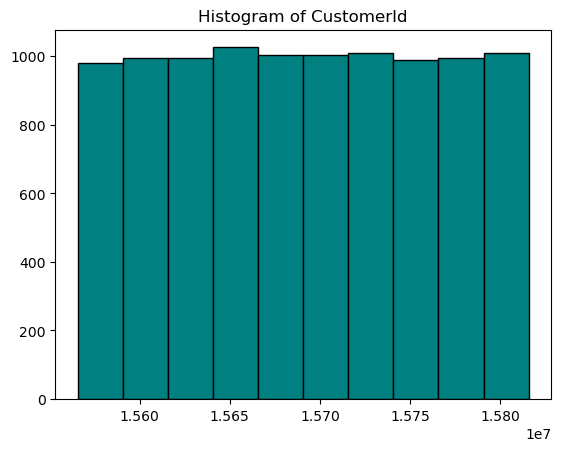

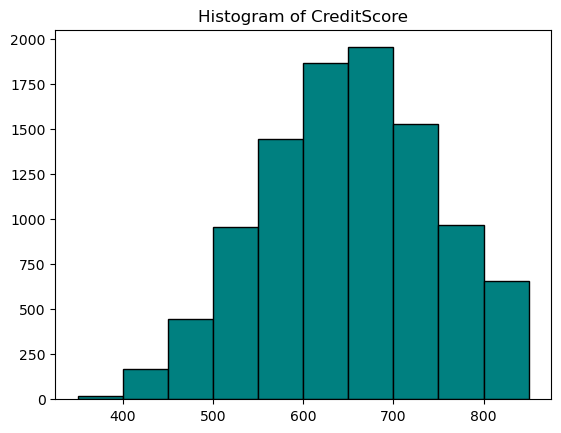

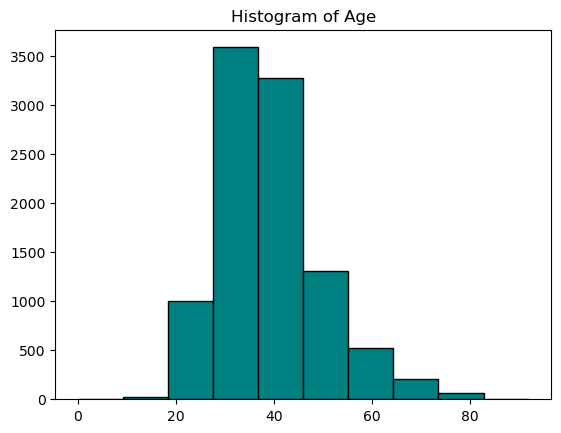

TypeError: 'value' must be an instance of str or bytes, not a float

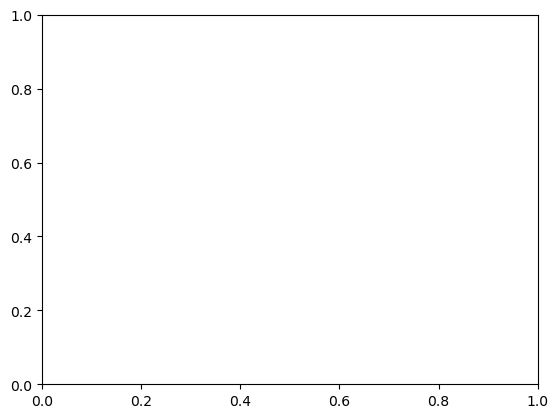

In [128]:
# Density/histogram plot of each numerical column

for column in num_columns:
    plt.hist(comb_df[column], color='teal', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

### DATA ANALYSIS

In [210]:
### Helper functions

def plot_pie(data, labels, title):
    plt.pie(data, labels=labels, autopct='%.0f%%')
    plt.title(f'{title}')
    plt.show()
plt.figure(figsize=(20,10))

def generate_bar_plot(x,y,xlabel,ylabel):
    plt.bar(x,y,color='grey', edgecolor= 'black')
    plt.title(f'plot of {ylabel} vs {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def generate_line_chart(x,y,xlabel,ylabel,data,color='grey', estimator=sum):
    sb.lineplot(x=x,y=y,markers=True, dashes=False, data=data, estimator=estimator,color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'plot of{ylabel} with changes in {xlabel}')
    plt.show()

def generate_bar_plot_with_labels(df,title, xlabel, ylabel):
    df.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    for location in plt.gca().containers:
        plt.gca().bar_label(location, label_type='edge')
    plt.xticks(rotation=0)
    plt.legend(title= title)
    plt.show()

<Figure size 2000x1000 with 0 Axes>

A) DEMOGRAPHIC ANALYSIS

In [217]:
result=comb_df.groupby('Geography')[['CustomerId']].count()
result

,CustomerId
Geography,
France,5014
Germany,2509
Spain,2477


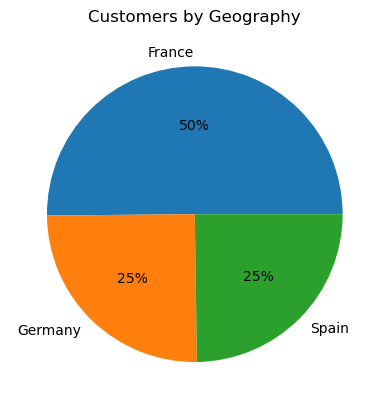

In [215]:
plot_pie(result['CustomerId'],result.index,'Customers by Geography')

In [218]:
result=comb_df.groupby('Gender')[['CustomerId']].count()
result

,CustomerId
Gender,
Female,4543
Male,5457


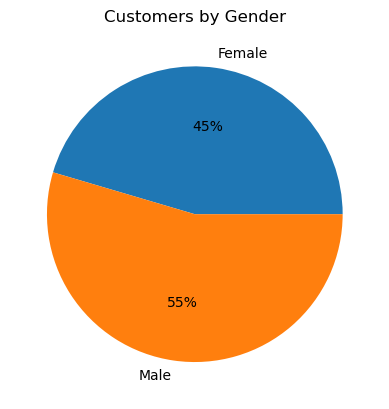

In [219]:
plot_pie(result['CustomerId'],result.index,'Customers by Gender')

`RESULT`: There are more male customers than female

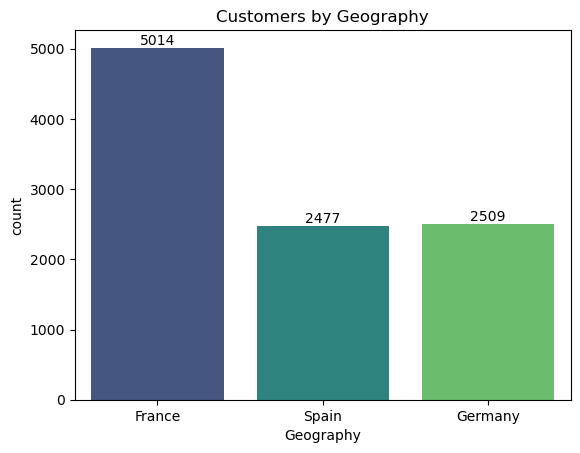

In [119]:
ax = sb.countplot(x='Geography', data=comb_df, palette= 'viridis')
plt.title('Customers by Geography')
for bar in ax.patches:
    yval = bar.get_height()  # Get the height of the bar
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Position of the label
            round(yval),  # Value label (rounded to 2 decimals if needed)
            ha='center', va='bottom', fontsize=10)  # Center alignment
plt.show()

`RESULT`:The majority of our customers are from France, with the rest are distributed between Spain and Germany.

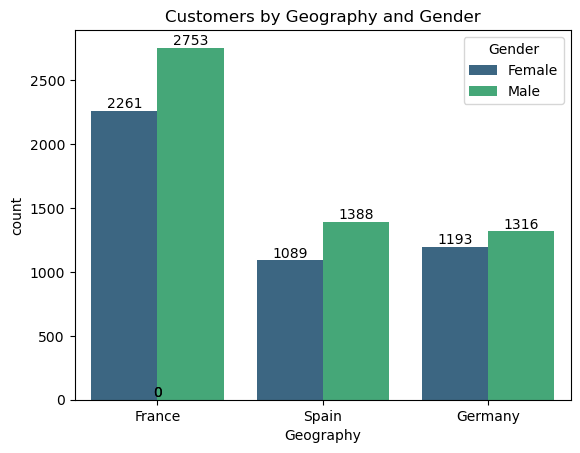

In [120]:
ax = sb.countplot(x='Geography', hue='Gender', data=comb_df, palette= 'viridis')
plt.title('Customers by Geography and Gender')
for bar in ax.patches:
    yval = bar.get_height()  # Get the height of the bar
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Position of the label
            round(yval),  # Value label
            ha='center', va='bottom', fontsize=10)  # Center alignment
plt.show()

`RESULT`: The majority of our customers are from France, and there is a trend of having more male customers than female customers across all countries.

2.CUSTOMER ENGAGEMENT PATTERN

Categorize Customers by Tenure


In [105]:
import warnings
warnings.filterwarnings('ignore')

In [232]:
bins = [0, 1, 3, 5, 10]  ###Started by grouping the tenure
labels = ['0-1 years', '1-3 years', '3-5 years', '5+years'] ###Bins are used to group continuous numeric data into categories or segments
comb_df['Tenure'] = pd.cut(comb_df['Tenure'], bins=bins, labels=labels)

TypeError: '<' not supported between instances of 'int' and 'str'

In [148]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,AgeGroup
0,15634602,Hargrave,619,France,Female,42,1-3 years,101348.88,0.00,1,Yes,Yes,yes,35-44
2,15647311,Hill,608,Spain,Female,41,0-1 years,112542.58,83807.86,1,Yes,Yes,no,35-44
3,15619304,Onio,502,France,Female,42,5+ years,113931.57,159660.80,3,No,No,yes,35-44
4,15701354,Boni,699,France,Female,39,0-1 years,93826.63,0.00,2,No,No,no,35-44
5,15737888,Mitchell,850,Spain,Female,43,1-3 years,79084.10,125510.82,1,Yes,Yes,no,35-44


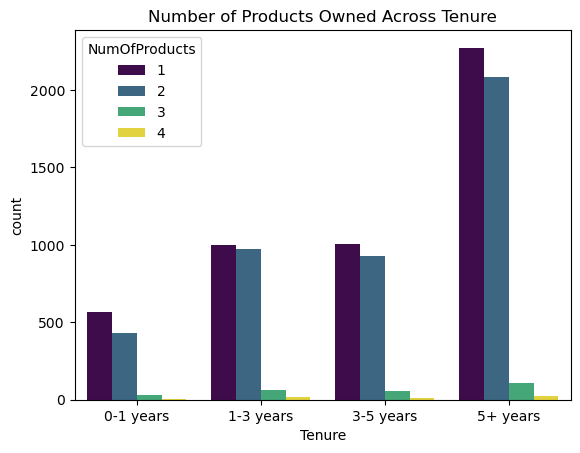

In [134]:
sb.countplot(x='Tenure', hue='NumOfProducts', data=comb_df, palette='viridis')
plt.title('Number of Products Owned Across Tenure')
plt.show()

`RESULT`: Customers who have banked with Hybrid Bank for five years or more hold the highest number of products, often having multiple accounts or services. Those who have been with the bank for one to five years also tend to have multiple products. However, the number of customers who have been with the bank the longest is significantly larger.

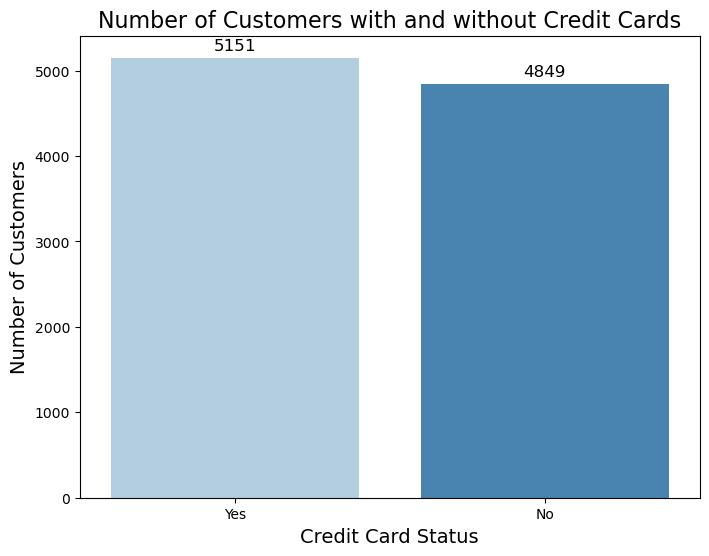

In [265]:
credit_card_counts = comb_df['HasCrCard'].value_counts()
plt.figure(figsize=(8, 6))
sb.barplot(x=credit_card_counts.index, y=credit_card_counts.values, palette='Blues')
for i, count in enumerate(credit_card_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=12)
plt.title('Number of Customers with and without Credit Cards', fontsize=16)
plt.xlabel('Credit Card Status', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.show()

`RESULT`: Just over half of the customer base is utilizing credit card services, while nearly half have opted not to.
Targeted marketing or product offerings could be designed to encourage this segment to acquire credit cards, potentially increasing customer engagement and revenue

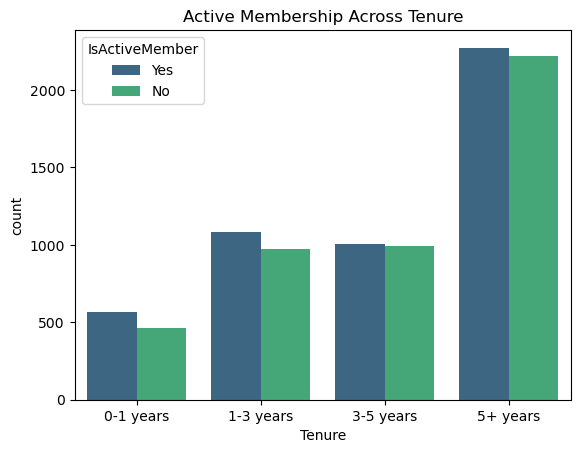

In [138]:
sb.countplot(x='Tenure', hue='IsActiveMember', data=comb_df, palette='viridis')
plt.title('Active Membership Across Tenure')
plt.show()

`RESULT`: Customers with 5+ years of tenure have the highest membership (both active and inactive), indicating strong retention over time.
Active membership is highest among customers with 5+ years, while shorter-tenure customers (especially 0-1 years) have a much smaller number of both active and inactive members.

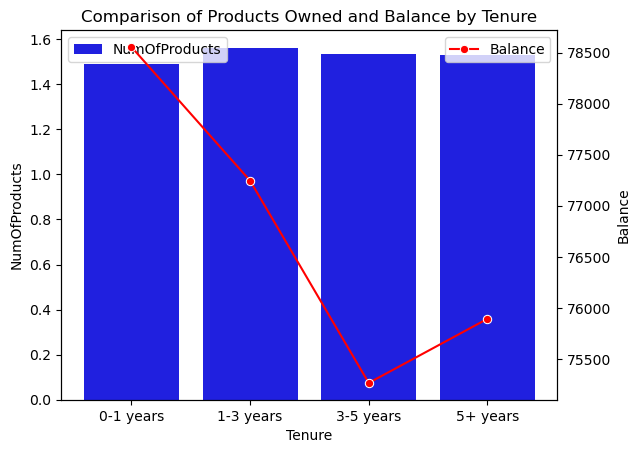

In [113]:
tenure_means = comb_df.groupby('Tenure')[['NumOfProducts', 'Balance']].mean().reset_index()
ax1 = sb.barplot(x='Tenure', y='NumOfProducts', data=tenure_means, color='blue', label='NumOfProducts')
ax2 = ax1.twinx()
ax2 = sb.lineplot(x='Tenure', y='Balance', data=tenure_means, color='red', marker='o', label='Balance')

plt.title('Comparison of Products Owned and Balance by Tenure')
plt.show()

`RESULT`: This suggests that while customers acquire multiple products early on, the number of products drops off after a few years. Similarly, average balances decrease over time, but there’s a slight increase after 5 years, indicating potential loyalty or renewed engagement among long-term customers.

3.FINANCIAL PERFORMANCE

To determine credit scores per age group

In [235]:
comb_df['Age_Group'] = pd.cut(comb_df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], include_lowest=True)

In [243]:
comb_df.drop('AgeGroup', axis=1,inplace=True)

In [246]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,BalanceSegment,Age_Group,Balance_Segment
0,15634602,Hargrave,619,France,Female,42,1-3 years,101348.88,0.00,1,Yes,Yes,yes,Low,35-44,Low
2,15647311,Hill,608,Spain,Female,41,0-1 years,112542.58,83807.86,1,Yes,Yes,no,Low,35-44,Elite
3,15619304,Onio,502,France,Female,42,5+ years,113931.57,159660.80,3,No,No,yes,High,35-44,Platinum
4,15701354,Boni,699,France,Female,39,0-1 years,93826.63,0.00,2,No,No,no,Low,35-44,Low
5,15737888,Mitchell,850,Spain,Female,43,1-3 years,79084.10,125510.82,1,Yes,Yes,no,High,35-44,Platinum


In [245]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,BalanceSegment,Age_Group,Balance_Segment
9996,15606229,Obijiaku,771,France,Male,39,3-5 years,96270.64,0.00,2,No,No,no,Low,35-44,Low
9997,15569892,Johnstone,516,France,Male,35,5+ years,101699.77,57369.61,1,Yes,Yes,no,Low,25-34,Elite
9998,15584532,Liu,709,France,Female,36,5+ years,42085.58,0.00,1,Yes,Yes,yes,Low,35-44,Low
9999,15682355,Sabbatini,772,Germany,Male,42,1-3 years,92888.52,75075.31,2,No,No,yes,Low,35-44,Elite
10000,15628319,Walker,792,France,Female,28,3-5 years,38190.78,130142.79,1,No,No,no,High,25-34,Platinum


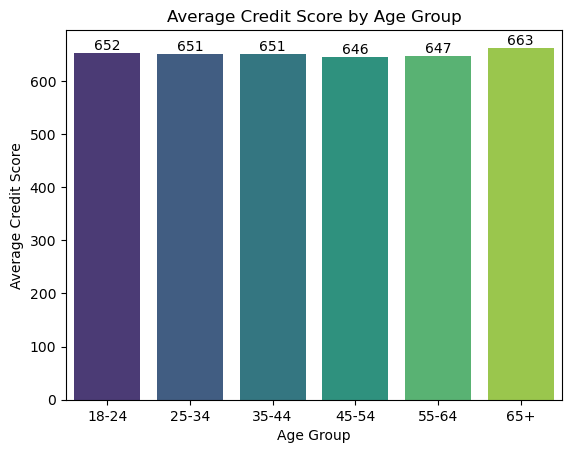

In [237]:
ax = sb.barplot(x='AgeGroup', y='CreditScore', data=avg_credit_by_age, palette='viridis')
plt.title('Average Credit Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Credit Score')
for bar in ax.patches:
    yval = bar.get_height() 
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, 
            round(yval),  
            ha='center', va='bottom', fontsize=10) 
plt.show()

`RESULT`: Customers aged 65 and above tend to have higher credit scores than those between 18 and 64, although the difference may not be significant.
Here's my thought: With more years of experience managing credit, older customers are likely to be more diligent about paying bills on time and avoiding risky financial behavior, which leads to higher creditworthiness. 
It could also be that they've had more time to build a credit history.

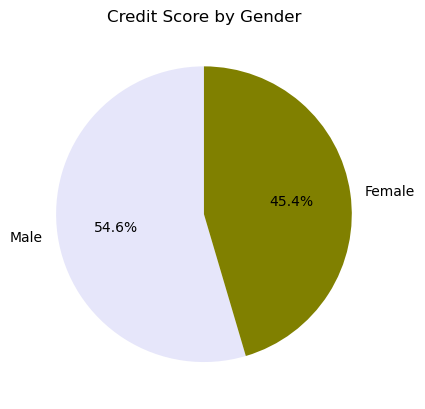

In [170]:
gender_dist = comb_df['Gender'].value_counts()

gender_dist.plot.pie(autopct='%1.1f%%', colors=['lavender', 'olive'], startangle=90)
plt.title('Credit Score by Gender')
plt.ylabel('')  
plt.show()

`RESULT`: There are more male customers than female. The relatively close percentages indicate that both genders have a fairly similar presence in terms of credit scores, with a minor leaning towards men.

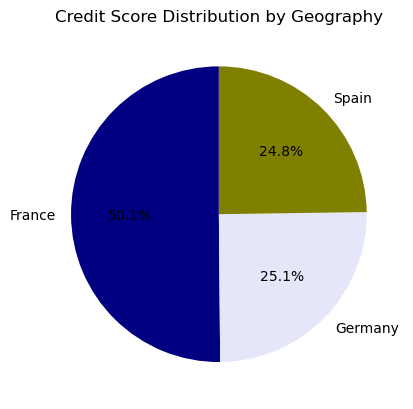

In [179]:
geo_dist = comb_df['Geography'].value_counts()

geo_dist.plot.pie(autopct='%1.1f%%', colors=['navy','lavender', 'olive'], startangle=90)
plt.title('Credit Score Distribution by Geography')
plt.ylabel('') 
plt.show()

`RESULT`: France holds the largest share, representing over half of the customers with credit scores. Both Germany and Spain account for roughly equal portions of the total (around 25% each), suggesting a more balanced credit score distribution between the two. This distribution implies that France is the primary market in terms of credit scores, while Germany and Spain have similar, though smaller, shares.

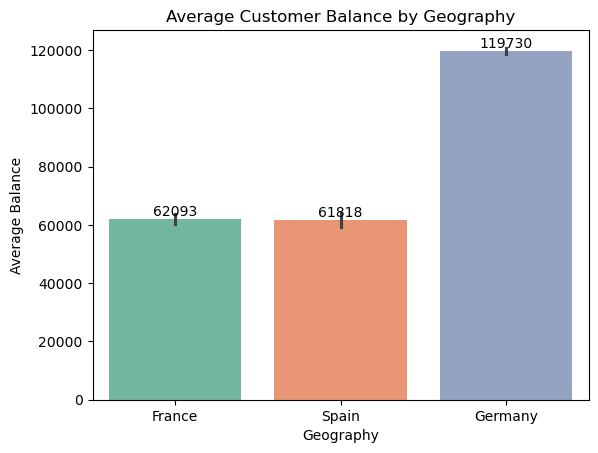

In [190]:
ax = sb.barplot(x='Geography', y='Balance', data=comb_df, palette='Set2')
plt.title('Average Customer Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Balance')
for bar in ax.patches:
    yval = bar.get_height()  # height of each bar 
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05,  # Position the text at the center and above the bar
            round(yval), 
            ha='center', va='bottom', fontsize=10)  # Center alignment
plt.show()

`RESULT`: This suggests that while France has the largest customer base, Germany's customers are far more valuable in terms of average balance

4.Exited Customers Analysis

In [223]:
comb_df['Exited'].value_counts()

Exited
no     7963
yes    2037
Name: count, dtype: int64

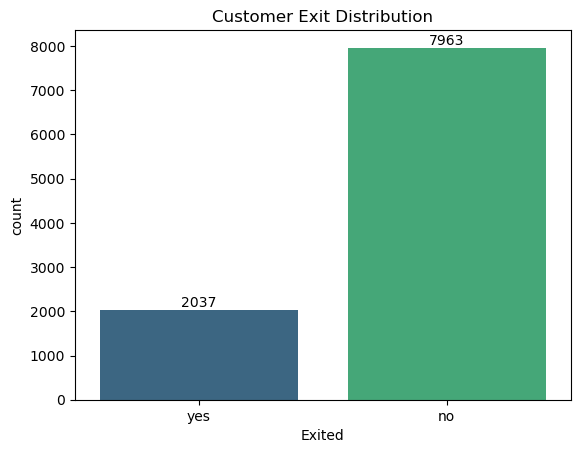

In [151]:
ax = sb.countplot(x='Exited', data=comb_df, palette='viridis')
plt.title('Customer Exit Distribution')   # Customers who left vs. stayed
for bar in ax.patches:
    yval = bar.get_height()  # Get the height of each bar (count)
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Position of the label
            int(yval),  # Value label (rounded to an integer)
            ha='center', va='bottom', fontsize=10)  # Center alignment
plt.show()

`RESULT`: In the analysis of customer retention for the bank, it was found that a majority of customers remain with the bank, demonstrating a strong retention rate. However, approximately 2,037 customers have exited, indicating a notable but relatively smaller proportion of the customer base leaving. This data highlights the bank's overall customer loyalty.

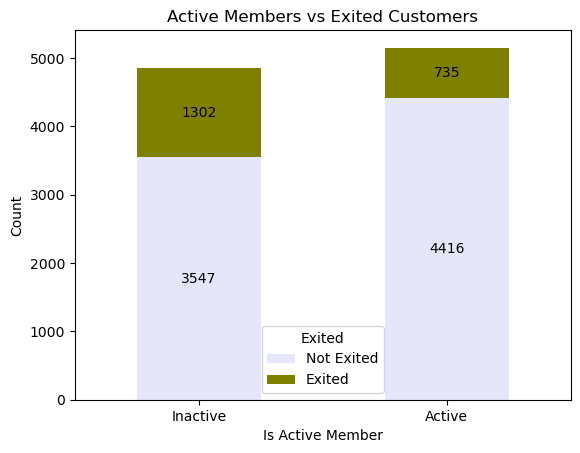

In [164]:
active_exited = comb_df.groupby(['IsActiveMember', 'Exited']).size().unstack().fillna(0)
ax = active_exited.plot(kind='bar', stacked=True, color=['lavender', 'olive']) #Create the plot
plt.title('Active Members vs Exited Customers') # Set title and labels
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.xticks([0, 1], ['Inactive', 'Active'], rotation=0)
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f')  # Displaying the values in the center of each bar
plt.show()

`RESULT`:For active customers, it would be beneficial to continue strengthening customer relationships to prevent any potential drop-off, even if the rate of exit is currently lower. With the exit rate between the two, it suggests that the bank's retention efforts are more effective with engaged customers. Those who were inactive were more likely to leave. This may indicate a lack of re-engagement strategies from the bank. 

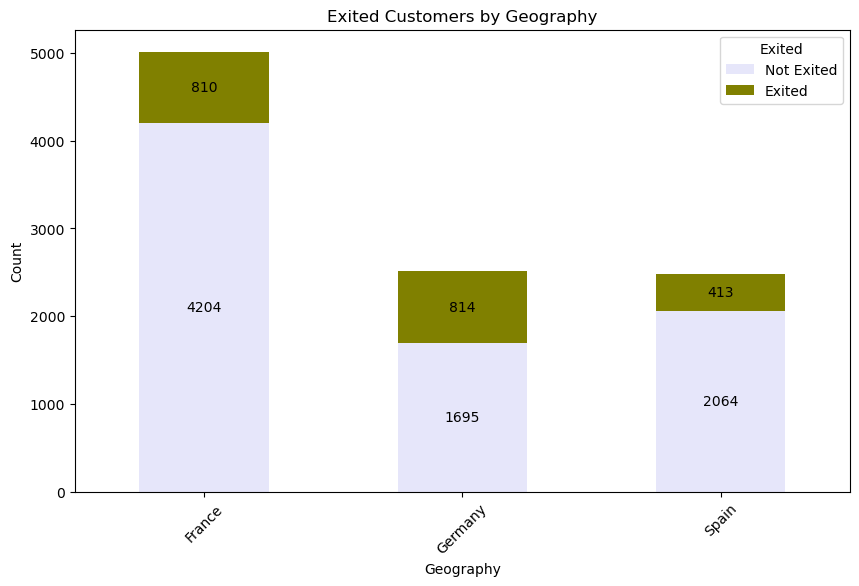

In [266]:
geo_exited = comb_df.groupby(['Geography', 'Exited']).size().unstack().fillna(0)
ax = geo_exited.plot(kind='bar', stacked=True, color=['lavender', 'olive'], figsize=(10,6))
plt.title('Exited Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f')  # Display the values inside the bars
plt.show()    


`RESULT`: Germany has the highest exit rate, with about 32.5% of its customers leaving the bank, indicating potential issues with retention in that market. France and Spain have lower exit rates, around 16%, suggesting that customer retention is relatively better in these countries.

5.Customer Segmentation

In [249]:
### Created a New Column for Customer Segments- in terms of low,High,very high Balance. 0-5000 is low; 5000-50000 is high, 50000-250000 is Elite

comb_df['Balance_Segment'] = pd.cut(
    comb_df['Balance'], 
    bins=[0, 5000, 50000, float('inf')], 
    labels=['Low', 'High', 'Elite'], 
    include_lowest=True
)

In [260]:
comb_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Age_Group,Balance_Segment
0,15634602,Hargrave,619,France,Female,42,1-3 years,101348.88,0.00,1,Yes,Yes,yes,35-44,Low
2,15647311,Hill,608,Spain,Female,41,0-1 years,112542.58,83807.86,1,Yes,Yes,no,35-44,Elite
3,15619304,Onio,502,France,Female,42,5+ years,113931.57,159660.80,3,No,No,yes,35-44,Elite
4,15701354,Boni,699,France,Female,39,0-1 years,93826.63,0.00,2,No,No,no,35-44,Low
5,15737888,Mitchell,850,Spain,Female,43,1-3 years,79084.10,125510.82,1,Yes,Yes,no,35-44,Elite
6,15574012,Chu,645,Spain,Male,44,5+ years,149756.71,113755.78,2,No,No,yes,35-44,Elite
7,15592531,Bartlett,822,France,Male,50,5+ years,10062.80,0.00,2,Yes,Yes,no,45-54,Low
8,15656148,Obinna,376,Germany,Female,29,3-5 years,119346.88,115046.74,4,No,No,yes,25-34,Elite
9,15792365,He,501,France,Male,44,3-5 years,74940.50,142051.07,2,Yes,Yes,no,35-44,Elite
10,15592389,H?,684,France,Male,27,1-3 years,71725.73,134603.88,1,Yes,Yes,no,25-34,Elite


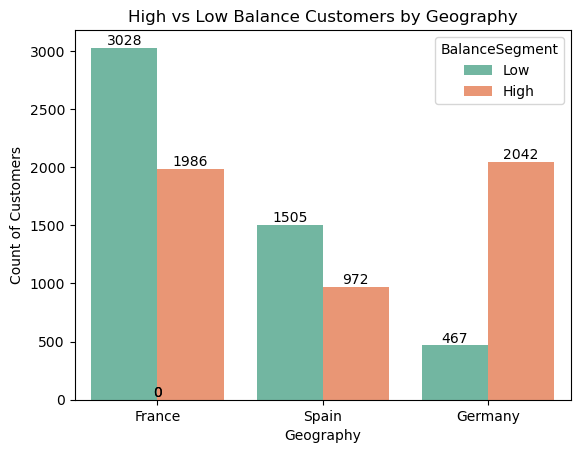

In [258]:
ax = sb.countplot(x='Geography', hue='BalanceSegment', data=comb_df, palette='Set2')
plt.title('High vs Low Balance Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count of Customers')
for bar in ax.patches:
    yval = bar.get_height()  # Get the height of each bar (the count)
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Position the label at the center and above the bar
            int(yval),  # Display the count value as an integer
            ha='center', va='bottom', fontsize=10)  # Center alignment
plt.show()

`RESULT`:  Germany has a significantly higher number of high balance customers compared to low balance ones. This suggests that a larger portion of the German customer base has high account balances, which may indicate a wealthier demographic or higher-value customers.

 In France, there are more low balance customers than high balance ones. This suggests that while the overall customer base may be large, a significant portion of the customers have lower balances, indicating a potentially broader range of less wealthy customers.
 
 Similar to France, low balance customers outnumber the high balance ones in Spain. However, the ratio between high and low balances is more balanced compared to France, with the difference being less pronounced.

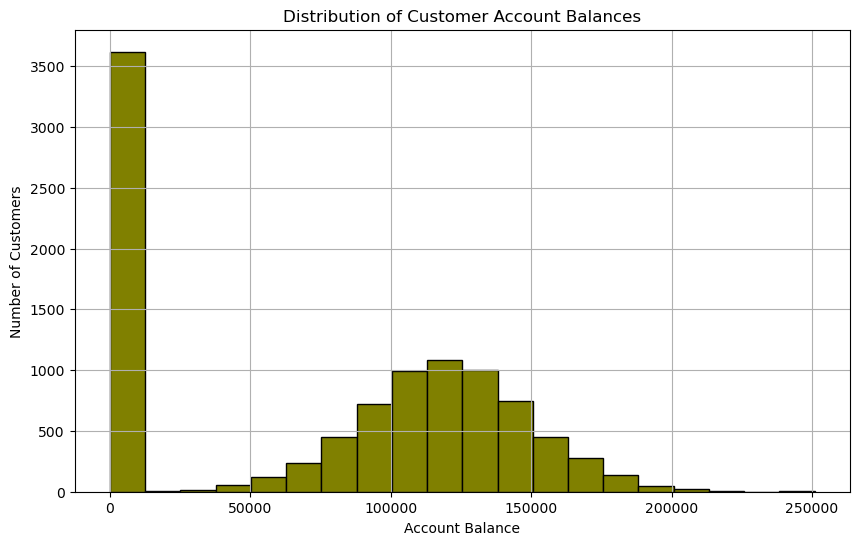

In [261]:
plt. figure(figsize=(10,6))
plt.hist(comb_df['Balance'], bins=20, color='olive', edgecolor='black')
plt.title( 'Distribution of Customer Account Balances')
plt.xlabel( 'Account Balance')
plt.ylabel( 'Number of Customers')
plt.grid (True)
plt.show()

`RESULT`: We have very few customers with account balances of 250,000, while over 3,500 customers have a zero balance. The remaining customers have balances ranging between 50,000 and 200,000.

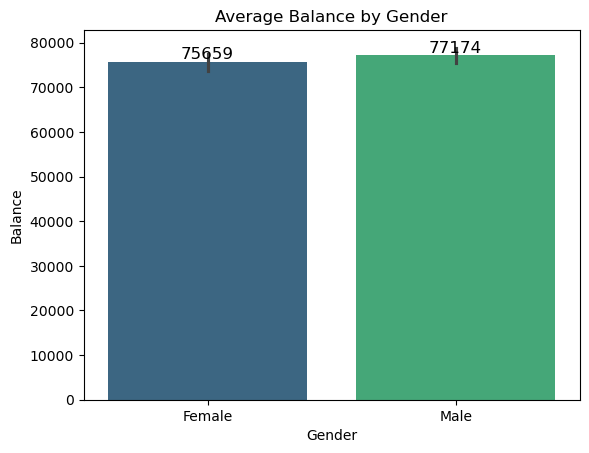

In [262]:
ax = sb.barplot(x='Gender', y='Balance', data=comb_df, estimator='mean', palette ='viridis')
plt.title('Average Balance by Gender')
for bar in ax.patches:
    yval = bar.get_height()  # Get the height (mean value) of the bar
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02,  # Position of the label
            round(yval),  # Value label rounded to 2 decimal places
            ha='center', va='bottom', fontsize=12)
plt.show() 

CUSTOMER WITH THE HIGHEST ACCOUNT BALANCE

In [263]:
highest_balance_customer = comb_df.loc[comb_df['Balance'].idxmax()]   ###The idxmax() function is used to find the index of the customer with the highest account balance
print("Customer with the highest balance:")                          
print(highest_balance_customer)

Customer with the highest balance:
CustomerId          15757408
Surname                   Lo
CreditScore              655
Geography              Spain
Gender                  Male
Age                       38
Tenure             1-3 years
EstimatedSalary      81054.0
Balance            250898.09
NumOfProducts              3
HasCrCard                Yes
IsActiveMember           Yes
Exited                   yes
Age_Group              35-44
Balance_Segment        Elite
Name: 2093, dtype: object


# Conclusion

This analysis of Hybrid Bank's customer data, segmented by geography and various customer attributes, provides valuable insights into customer demographics, engagement patterns, financial performance, and retention trends across three key markets: **France, Spain, and Germany**.

`DEMOGRAPHIC ANALYSIS`
Hybrid Bank's customer base has a **55% male and 45% female distribution** across all three countries, with **France** having the largest number of customers, followed by **Spain and Germany** reflecting the bank's strong market presence in France. This suggests that efforts in France should focus on increasing value from this substantial customer base, while Spain and Germany present opportunities for growth and retention.

`Customer Engagement Patterns`
In terms of customer engagement, those with **5+ years of tenure** at Hybrid Bank exhibit the highest levels of product ownership, suggesting that long-term customers are more likely to hold multiple products. While customers with shorter tenures (1–5 years) also have multiple products, the total number of products held decreases slightly over time. However, there is a slight increase in product engagement among customers with 5+ years of tenure, suggesting strong customer retention and possible renewed loyalty among long-term customers. Active membership is also highest among long-tenure customers, while newer customers (0–1 years) show lower engagement. Therefore, Hybrid Bank can benefit from introducing retention programs or incentives aimed at retaining customers in their early years while continuing to foster loyalty among its long-tenured clients.

`Financial Performance`
In terms of financial performance, customers aged **65 and above** have slightly higher credit scores compared to those aged 18–64. This could be attributed to older customers having more experience managing credit and a longer credit history. While the difference in credit scores is not substantial, it highlights the creditworthiness of the older customer segment, which could be linked to their financial stability. While the differences in credit scores across age groups are not large, Hybrid Bank should leverage this insight to offer personalized products that suit the financial behaviors and needs of all age groups.

`Exited Customers Analysis`
The retention rate at Hybrid Bank is generally strong, with the majority of customers remaining with the bank. However, a significant number—around **2,037 customers**—have exited, representing a notable, though relatively small, proportion of the customer base. **Germany** has the highest exit rate at **32.5%**, indicating potential retention challenges in this market. In contrast, **France and Spain** exhibit lower exit rates, around **16%**, demonstrating relatively better customer loyalty in these countries. The data also suggests that **inactive customers** are more likely to leave, pointing to a need for stronger **re-engagement strategies** to retain these customers and reduce the exit rate further. Special attention should be given to Germany, where the bank could introduce personalized services, loyalty programs, or customer feedback initiatives to better understand and address the reasons for customer exits.

`Customer Segmentation`
Customer segmentation by balance highlights significant geographical differences. **Germany** stands out with a much larger proportion of **high balance customers**, suggesting that this market consists of a wealthier demographic or more valuable customers.This suggests that Hybrid Bank's efforts in Germany should focus on **high-value retention strategies** that cater to wealthier clients, such as premium banking services, personalized financial advice, or exclusive product offerings. This, however, contrasts with **France**, where **low balance customers** outnumber high balance ones, suggesting a broader customer base with varying financial profiles. The bank could explore offering financial products designed to help these customers grow their wealth, such as savings incentives, investment opportunities, or tailored credit products. **Spain** displays a more balanced distribution between high and low balance customers, though low balance accounts still outnumber high balance ones.

`INSIGHTS`
Overall, the demographic, financial, and engagement data offer key insights into **Hybrid Bank's customer base**. Germany presents a wealthier, high-value segment with a retention challenge, while France and Spain have more diverse customer bases but relatively lower balances. The retention strategies should focus on engaging both new and inactive customers, especially in Germany, to reduce the exit rate and build long-term loyalty. Additionally, understanding the financial behaviors of older customers and those with longer tenure can help shape more targeted product offerings and engagement strategies.


# RECOMMENDATION
To maximize growth and retention, Hybrid Bank should focus on the following strategies:

- Introduce targeted retention efforts in Germany, focusing on high-balance customers and addressing reasons for high exit rates through personalized communication and loyalty initiatives.

- Reactivate dormant or zero-balance accounts by offering incentives such as fee waivers or product bundles to encourage more financial activity.

- Strengthen early-stage customer engagement with welcome offers, product education, and financial tools to enhance loyalty and product adoption in the early years

- Offer personalized products for older, creditworthy customers, such as investment services or tailored loans, and design strategies that cater to the wealthier segments in Germany and the lower-balance segments in France.

**By implementing these strategies, Hybrid Bank can enhance customer loyalty, increase product engagement, and capture more value across its diverse geographical markets.**
